___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

In [3]:
lancamentos = []
for i in range(1000000):
    lancamentos.append(np.random.randint(1,7))

dados = pd.Series(lancamentos)
dados.value_counts(True)

4    0.167173
1    0.167089
2    0.166903
5    0.166611
3    0.166323
6    0.165901
dtype: float64

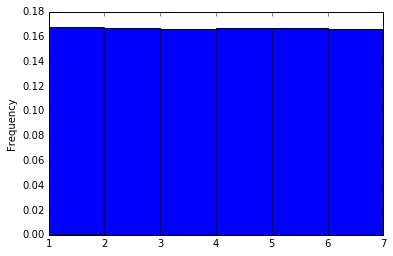

In [10]:
faixa= range(1,8)
dados.plot.hist(bins=faixa, normed=1 )

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [6]:
lancamentos2 = []

for i in range(1000000):
    lancamentos2.append((np.random.randint(1,7) + np.random.randint(1,7)))

dados2 = pd.Series(lancamentos2)
dados2.value_counts(True)

7     0.166891
6     0.138947
8     0.138899
9     0.110903
5     0.110845
4     0.083706
10    0.082780
3     0.055894
11    0.055626
2     0.027883
12    0.027626
dtype: float64

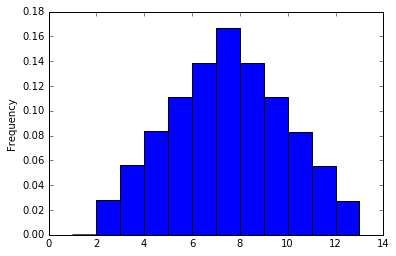

In [8]:
faixa= range(1,14)
dados2.plot.hist(bins=faixa, normed=1 )

In [14]:
lancamentos3 = []
lancamentos4 = []

for i in range(1000000):
    lancamentos3.append(np.random.randint(1,7))
    lancamentos4.append((lancamentos3[i] + np.random.randint(1,7)))

dados3 = pd.Series(lancamentos4)
dados3.value_counts(True)

7     0.166719
8     0.138966
6     0.138957
5     0.111090
9     0.111014
4     0.083406
10    0.083286
11    0.055820
3     0.055182
2     0.027887
12    0.027673
dtype: float64

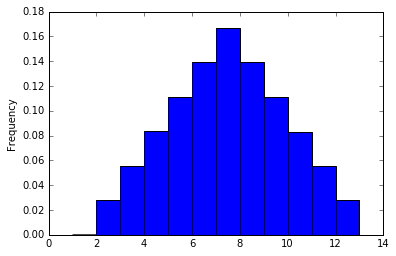

In [15]:
faixa= range(1,14)
dados3.plot.hist(bins=faixa, normed=1 )

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [7]:

def Monty_Hall(ITERACOES):
    vitórias = 0
    derrotas = 0 
    for i in range(ITERACOES):
        premiada = np.random.randint(1,4)
        escolhida = np.random.randint(1,4)
        if premiada == 1 and escolhida == 1:
            aberta = np.random.randint(2,4)
        elif premiada == 2 and escolhida == 2:
            a = np.random.randint(1,3)
            if a == 1:
                aberta = 1
            if a == 2:
                aberta = 3
        elif premiada == 3 and escolhida == 3:
            aberta = np.random.randint(1,3)
        elif (premiada == 3 and escolhida == 1) or (premiada == 1 and escolhida == 3):
            aberta = 2
        elif (premiada == 2 and escolhida == 1) or (premiada == 1 and escolhida == 2):
            aberta = 3
        elif (premiada == 3 and escolhida == 2) or (premiada == 2 and escolhida == 3):
            aberta = 1

        if premiada == 1 and escolhida == 1 and (aberta == 2 or aberta == 3) or premiada == 2 and escolhida == 2 and (aberta == 1 or aberta == 3) or premiada == 3 and escolhida == 3 and (aberta == 2 or aberta == 1) :
            derrotas += 1
        elif (premiada == 1 and escolhida == 2 and aberta == 3) or (premiada == 1 and escolhida == 3 and aberta == 2) or (premiada == 2 and escolhida == 1 and aberta == 3) or (premiada == 2 and escolhida == 3 and aberta == 1) or (premiada == 3 and escolhida == 1 and aberta == 2) or (premiada == 3 and escolhida == 2 and aberta == 1): 
            vitórias+=1
        
    return print('Vitórias: (Tende a 66%)', vitórias/ITERACOES *100, '%'), print('Derrotas: (Tende a 33%)', derrotas/ITERACOES *100, '%'),  print('Vitórias/Derrotas: (Tende a 2)', vitórias/derrotas)

In [8]:
Monty_Hall(10)

Vitórias: (Tende a 66%) 70.0 %
Derrotas: (Tende a 33%) 30.0 %
Vitórias/Derrotas: (Tende a 2) 2.3333333333333335


(None, None, None)

In [9]:
Monty_Hall(100)

Vitórias: (Tende a 66%) 70.0 %
Derrotas: (Tende a 33%) 30.0 %
Vitórias/Derrotas: (Tende a 2) 2.3333333333333335


(None, None, None)

In [10]:
Monty_Hall(1000)

Vitórias: (Tende a 66%) 68.2 %
Derrotas: (Tende a 33%) 31.8 %
Vitórias/Derrotas: (Tende a 2) 2.1446540880503147


(None, None, None)

In [11]:
Monty_Hall(10000)

Vitórias: (Tende a 66%) 66.05 %
Derrotas: (Tende a 33%) 33.95 %
Vitórias/Derrotas: (Tende a 2) 1.9455081001472754


(None, None, None)

Vitórias: (Tende a 66%) 66.05 %
Derrotas: (Tende a 33%) 33.95 %
Vitórias/Derrotas: (Tende a 2) 1.9455081001472754


(None, None, None)

In [12]:
Monty_Hall(100000)

Vitórias: (Tende a 66%) 66.619 %
Derrotas: (Tende a 33%) 33.381 %
Vitórias/Derrotas: (Tende a 2) 1.9957161259399059


(None, None, None)

Vitórias: (Tende a 66%) 66.619 %
Derrotas: (Tende a 33%) 33.381 %
Vitórias/Derrotas: (Tende a 2) 1.9957161259399059


(None, None, None)

In [13]:
Monty_Hall(1000000)

Vitórias: (Tende a 66%) 66.5798 %
Derrotas: (Tende a 33%) 33.4202 %
Vitórias/Derrotas: (Tende a 2) 1.99220232075212


(None, None, None)